**Questions I am trying to answer:**


1 ) What is the change in price of the stock over time?

2 ) What is the moving average of the various stocks?

3 ) What is the daily return of the stock on average?

4 ) What is the correlation between daily returns?

5 ) How much risk by investing in a particular stock?

6 ) How to predict future stock behavior?


In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')
%matplotlib inline

In [3]:
# Installing pandas_datareder package
# !pip install pandas_datareader

In [3]:
import pandas_datareader as pdr

In [4]:
from datetime import datetime

In [5]:
# Using the stocks of Apple, Google, Amazon, Microsoft
tech_list = ['AAPL','GOOG','AMZN','MSFT']

# Setting up start and end date
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

# Grabing stocks from Yahoo Finance
for stock in tech_list:
    globals()[stock] = pdr.DataReader(stock, 'yahoo', start, end)

In [6]:
# Summary Stats
AAPL.head(n=3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-21,139.669998,133.589996,133.800003,136.869995,120150900.0,136.031387
2021-01-22,139.850006,135.020004,136.279999,139.070007,114459400.0,138.217926
2021-01-25,145.089996,136.539993,143.070007,142.919998,157611700.0,142.044327


In [7]:
AAPL.shape

(254, 6)

In [8]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,144.675473,141.756063,143.177185,143.267047,8.958572e+07,142.930372
std,16.273379,15.854594,15.981352,16.058534,2.868555e+07,16.244081
min,120.400002,116.209999,119.029999,116.360001,4.100000e+07,115.819870
25%,130.982498,128.902504,130.015003,130.247505,6.889110e+07,129.780861
50%,144.525002,141.750000,143.439995,143.050003,8.434445e+07,142.711716
75%,151.427494,148.737499,149.910004,149.997501,1.054095e+08,149.928692
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,182.009995


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-01-21 to 2022-01-21
Data columns (total 6 columns):
High         254 non-null float64
Low          254 non-null float64
Open         254 non-null float64
Close        254 non-null float64
Volume       254 non-null float64
Adj Close    254 non-null float64
dtypes: float64(6)
memory usage: 13.9 KB


1 ) What is the change in price of the stock over time?

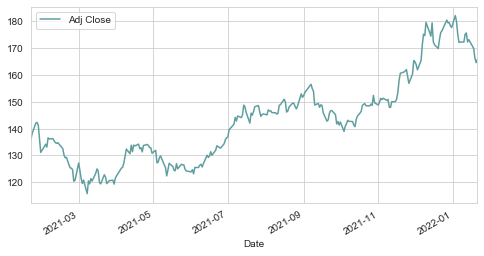

In [10]:
AAPL['Adj Close'].plot(legend = True, figsize = (8,4), color = 'cadetblue')

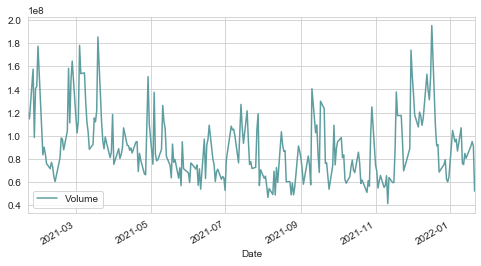

In [11]:
AAPL['Volume'].plot(legend = True, figsize = (8,4), color = 'cadetblue')

2 ) What is the moving average of the various stocks?

In [12]:
# Calculating Moving Average (MA)
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = 'MA for %s Days' %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

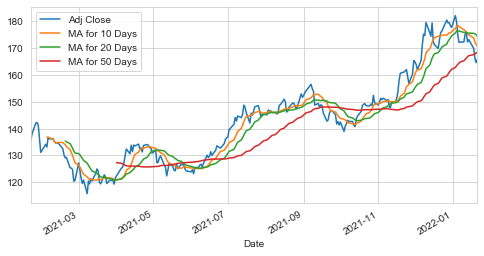

In [13]:
AAPL[['Adj Close','MA for 10 Days','MA for 20 Days','MA for 50 Days']].plot(subplots = False, figsize = (8,4))

3 ) What is the daily return of the stock on average?

In [14]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

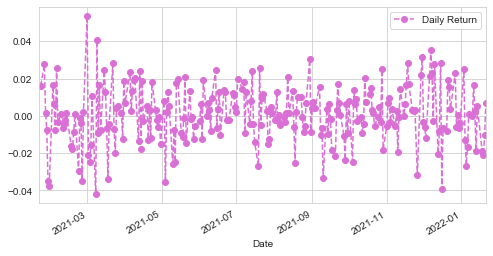

In [15]:
AAPL['Daily Return'].plot(legend = True, figsize = (8,4), marker = 'o', linestyle ='--', color = 'orchid')

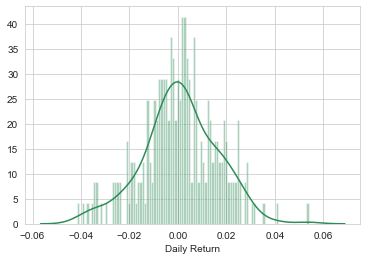

In [16]:
sb.distplot(AAPL['Daily Return'].dropna(), bins = 100, color ='seagreen' )

In [17]:
adj_df = pdr.DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [18]:
adj_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-01-21,136.031387,3306.989990,1891.250000,223.099915
2021-01-22,138.217926,3292.229980,1901.050049,224.071762
2021-01-25,142.044342,3294.000000,1899.400024,227.621994
2021-01-26,142.282852,3326.129883,1917.239990,230.398743
2021-01-27,141.189606,3232.580078,1830.790039,230.964005


In [19]:
# Daily Return Data Frame
ret_df = adj_df.pct_change()

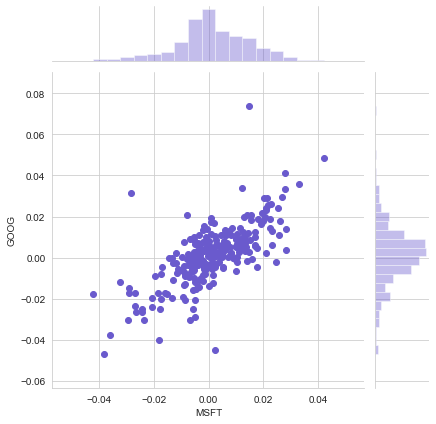

In [20]:
sb.jointplot('MSFT', 'GOOG', ret_df, kind = 'scatter', color = 'slateblue')

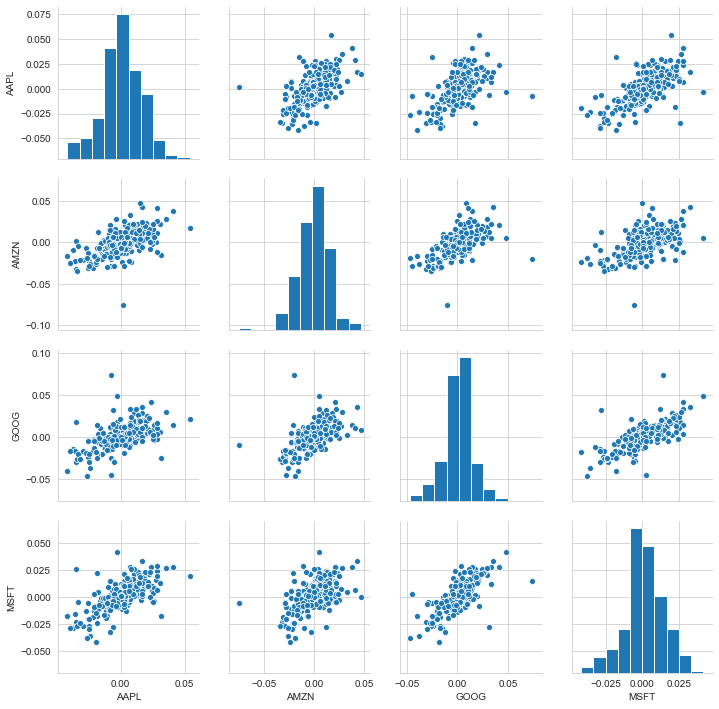

In [21]:
sb.pairplot(ret_df.dropna())

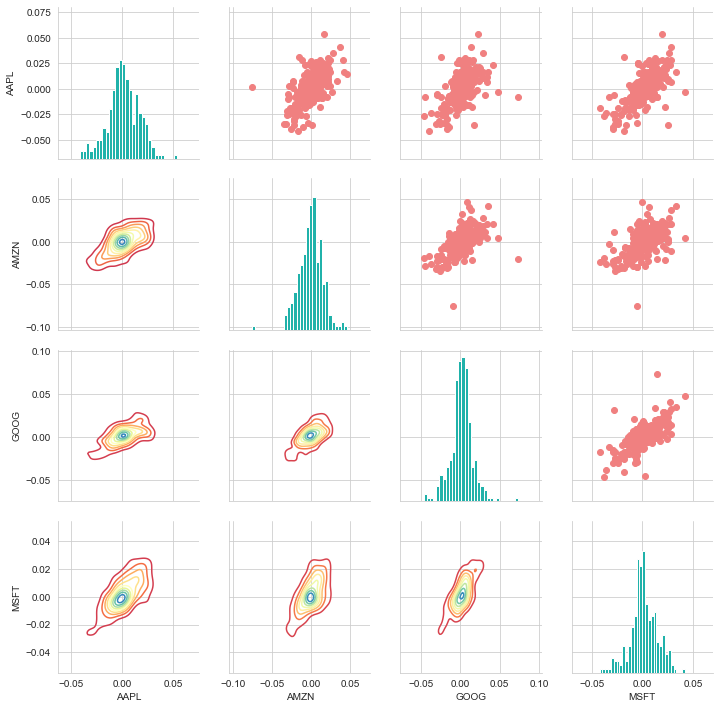

In [22]:
ret_fig = sb.PairGrid(ret_df.dropna())
ret_fig.map_upper(plt.scatter, color ='lightcoral')
ret_fig.map_lower(sb.kdeplot, cmap = 'Spectral')
ret_fig.map_diag(plt.hist, color = 'lightseagreen', bins = 30)

4 ) What is the correlation between daily returns?

Symbols      AAPL      AMZN      GOOG      MSFT
Symbols                                        
AAPL     1.000000  0.583162  0.544604  0.665836
AMZN     0.583162  1.000000  0.575680  0.554885
GOOG     0.544604  0.575680  1.000000  0.710847
MSFT     0.665836  0.554885  0.710847  1.000000


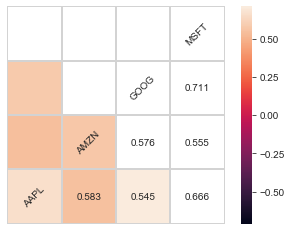

In [23]:
# Compute the Correlation Matrix
corr = ret_df.corr()
print(corr)

# Generate a Mask to Plot Part of the Matrix
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap
vmax = np.abs(corr.values[~mask]).max()
sb.heatmap(corr, mask = mask, vmin = -vmax, vmax = vmax,
            square = True, linecolor = "lightgray", linewidths = 1, ax = ax)

for i in range(len(corr)):
    ax.text(i + 0.5, len(corr)-(i + 0.5), corr.columns[i], ha = "center", va = "center", rotation = 45)
    for j in range(i + 1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j + 0.5, len(corr)-(i + 0.5), s, ha = "center", va = "center")
ax.axis("off")
plt.show()

From the correlation we observe that Google and Microsoft have the highest correlation and Google and Apple have the least one. The same conclusion that we can get from the pair plot. 

5 ) How much risk by investing in a particular stock?

The simple way to analyze the risk is by comparing the expected return with the standard deviation of the daily returns.

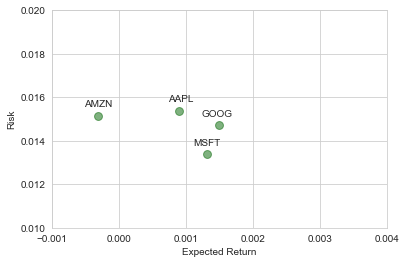

In [24]:
rets = ret_df.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(), alpha = 0.5, s = area, color = 'darkgreen')

plt.xlabel('Expected Return')
plt.ylabel('Risk')

plt.ylim([0.01, 0.02])
plt.xlim([-0.001, 0.004])

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (14, 7),
        textcoords = 'offset points', ha = 'right', va = 'bottom')

**Value at Risk**

Is the amount of money we could expect to lose for a given confidence interval. 
Two methods for estimating a value at risk are Bootstrap and Monte Carlo.

**1.) Bootstrap Method:**

For this method the empirical quantiles can be calculated from daily returns histogram.

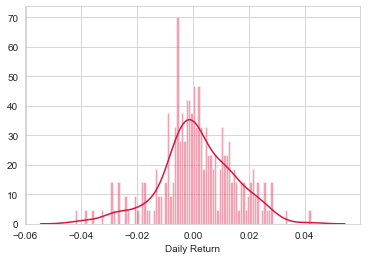

In [25]:
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
sb.distplot(MSFT['Daily Return'].dropna(), bins = 100, color = 'crimson')

In [26]:
# The 0.05 empirical quantile of daily returns for MSFT
rets['MSFT'].quantile(0.05)

-0.023958678520191665

The 0.05 empirical quantile of daily returns is at -0.026 which means that with 95% confidence, our worst daily loss will not exceed 2.6%. In other way, if we have a 1 million dollar investment, our one-day 5% VaR is: 0.026 * 1,000,000 = $26,000.

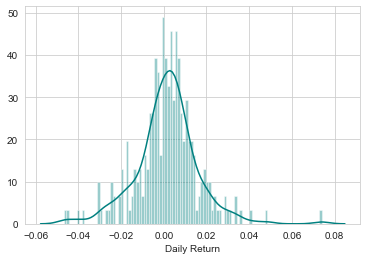

In [27]:
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
sb.distplot(GOOG['Daily Return'].dropna(), bins = 100, color = 'teal')

In [28]:
# The 0.05 empirical quantile of daily returns for GOOG
rets['GOOG'].quantile(0.05)

-0.024261671466607092

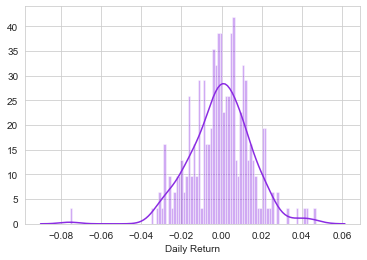

In [29]:
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()
sb.distplot(AMZN['Daily Return'].dropna(), bins = 100, color = 'blueviolet')

In [30]:
# The 0.05 empirical quantile of daily returns for AMZN
rets['AMZN'].quantile(0.05)

-0.025918716414187304

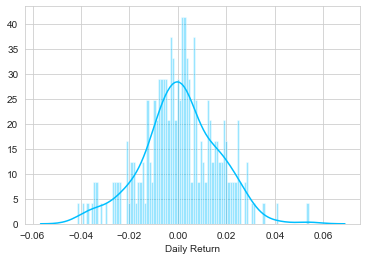

In [31]:
sb.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'deepskyblue')

In [32]:
# The 0.05 empirical quantile of daily returns for AAPL
rets['AAPL'].quantile(0.05)

-0.02562252626564423

**2.) Monte Carlo Method:**

In this method we run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, we can't perfectly predict the future solely based on the previous price of a stock.

Geometric Browninan Motion:

$$ \frac{\Delta S}{S}={\mu}{\Delta t}+{\sigma}{\epsilon}\sqrt{\Delta t} $$

Where **S** is the stock price, $\mu$ is the expected return, $\sigma$ is the standard deviation of the returns, **t** is the time, and $\epsilon$ is the random variable.

We can mulitply both sides by the stock price **S** to rearrange the formula and solve for the stock price.

$$ {\Delta S}={S}({\mu}{\Delta t}+{\sigma}{\epsilon}\sqrt{\Delta t}) $$

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as **drift**, which is the average daily return multiplied by the change of time. The second term is known as **shock**, for each time period the stock will *drift* and then experience a *shock* which will randomly push the stock price up or down. By simulating this series of steps of *drift* and *shock* thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

More info on Monte Carlo method for stocks: http://www.investopedia.com/articles/07/montecarlo.asp

In [33]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-01-22,0.016074,-0.004463,0.005182,0.004356
2021-01-25,0.027684,0.000538,-0.000868,0.015844
2021-01-26,0.001679,0.009754,0.009392,0.012199
2021-01-27,-0.007684,-0.028126,-0.045091,0.002453
2021-01-28,-0.034985,0.001559,0.017654,0.025891


In [34]:
days = 365

dt = 1/days

mu = rets.mean()['AAPL']

sigma = rets.std()['AAPL']

In [35]:
def monte_carlo_price(start_price, days, mu, sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    drift = np.zeros(days)
    shock = np.zeros(days)
    
    for x in range(1, days):
        
        shock[x] = np.random.normal(loc = mu * dt, scale = sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [36]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 Days,MA for 20 Days,MA for 50 Days,Daily Return
Date,,,,,,,,,,
2021-01-21,139.669998,133.589996,133.800003,136.869995,120150900.0,136.031387,NaN,NaN,NaN,NaN
2021-01-22,139.850006,135.020004,136.279999,139.070007,114459400.0,138.217926,NaN,NaN,NaN,0.016074
2021-01-25,145.089996,136.539993,143.070007,142.919998,157611700.0,142.044327,NaN,NaN,NaN,0.027684
2021-01-26,144.300003,141.369995,143.600006,143.160004,98390600.0,142.282867,NaN,NaN,NaN,0.001679
2021-01-27,144.300003,140.410004,143.429993,142.059998,140843800.0,141.189606,NaN,NaN,NaN,-0.007684


Text(0.5, 1.0, 'Monte Carlo Stock Analysis for APPLE')

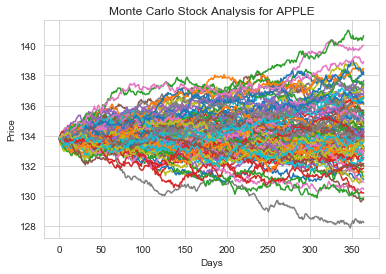

In [37]:
# If the start price (column = Open) is equal to 133.8
start_price = 133.8

for run in range (100):
    plt.plot(monte_carlo_price(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Stock Analysis for APPLE')

In [38]:
# Create an empty matrix to hold the end price data and run in 1000 times
runs = 1000
simulation = np.zeros(runs)

for run in range(runs):
    simulation[run] = monte_carlo_price(start_price, days, mu, sigma)[days-1]

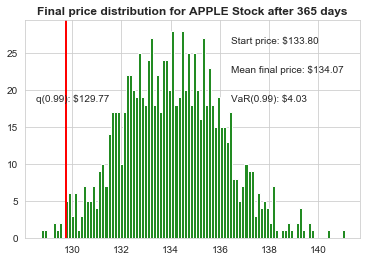

In [46]:
# Now we'lll define q as the 1% empirical qunatile (define our risk for this stock), 
## this basically means that 99% of the values should fall between here
q = np.percentile(simulation, 1)

# Plot the distribution of the end prices
plt.hist(simulation, bins = 100, color = 'forestgreen')

# Add info 
plt.figtext(0.6, 0.8, s = 'Start price: $%.2f' % start_price)
plt.figtext(0.6, 0.7, 'Mean final price: $%.2f' % simulation.mean())
plt.figtext(0.6, 0.6, 'VaR(0.99): $%.2f' % (start_price - q,))

plt.figtext(0.15, 0.6, 'q(0.99): $%.2f' % q)

plt.axvline(x = q, linewidth = 2, color = 'red')

plt.title(u"Final price distribution for APPLE Stock after %s days" % days, weight = 'bold');

The **value at risk** for the APPLE stock is 4.03 dollar for every investment of 133.80 which means 99 percent of the time for every initial stock we purchase 4.03 dollar will be at risk. 